In [107]:
import h5py
import copy
import lmfit
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from rich.progress import Progress
from scipy.stats import binned_statistic
from utils.plot_utils import set_fontsize
from utils.hdf_utils import load_measurement_data_devices_attrs

In [108]:
hdf_dir = Path("../data")

In [109]:
yag_channel = 0
pmt_channel = 1
pd_channel = 2
pdn_channel = 3

In [112]:
fname = "2021_3_2.hdf"

with h5py.File(hdf_dir / fname, 'r') as f:
    print(list(f.keys()))

['1614700966 find R0 F1', '1614702091 R0 F1 saturation 23 mW', '1614702994 alignment check center window', '1614704952 alignment check center window', '1614704992 alignment check center window', '1614705973 find Q4 absorption with R0 F1 fluorescence', '1614705995 find Q4 absorption with R0 F1 fluorescence', '1614707432 find Q4 absorption with R0 F1 fluorescence', '1614708145 find Q4 absorption with R0 F1 fluorescence', '1614708522 correlation check R0 F1 fluorescence Q4 absorption', '1614709220 correlation check R0 F1 fluorescence Q4 absorption no lowpass', '1614709368 correlation check R0 F1 fluorescence Q4 absorption no lowpass', '1614714999 correlation check R0 F1 fluorescence Q4 absorption no lowpass', '1614715288 correlation check R0 F1 fluorescence Q4 absorption no lowpass', '1614716135 correlation check R0 F1 fluorescence Q4 absorption 5 mm up from center', '1614716813 correlation check R0 F1 fluorescence Q4 absorption 5 mm down from center', '1614723484 correlation R0 F1 fl wit

In [5]:
dset_name = "1614702994 alignment check center window"
devices = ()

In [22]:
slice_flm  = np.s_[100:250]
slice_absm = np.s_[:]
slice_fli  = np.s_[100:]
slice_absi = np.s_[10:1000]

# Alignment check center window 23 mW

In [23]:
dset_name = "1614702994 alignment check center window"
devices = ()

In [24]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(hdf_dir / fname, dset_name, devices)

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
norm_data = -pd_data/pdn_data

In [25]:
dset_len = 2000
nbunch = 5

mask_yag = yag_data.max(axis = 1) < 500
mask_absorption = norm_data.max(axis = 1) > 0
pmt_data[mask_yag | mask_absorption] = np.nan
norm_data[mask_yag | mask_absorption] = np.nan

pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)

pmt_data_avg -= pmt_data_avg[:,slice_flm].mean(axis = 1)[:,np.newaxis]
norm_data_avg -= norm_data_avg[:,slice_absm].mean(axis = 1)[:,np.newaxis]

fluorescence_integral = np.trapz(pmt_data_avg[:,slice_fli], axis = 1)
absorption_integral = np.trapz(norm_data_avg[:,slice_absi], axis = 1)

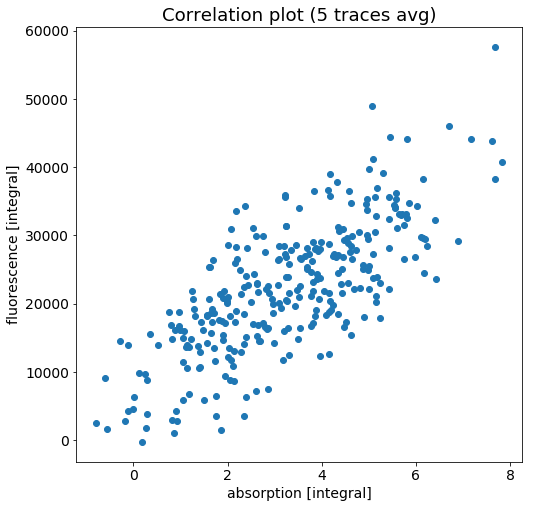

In [26]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(absorption_integral, fluorescence_integral, '.', ms = 12)

ax.set_title(f"Correlation plot ({nbunch} traces avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


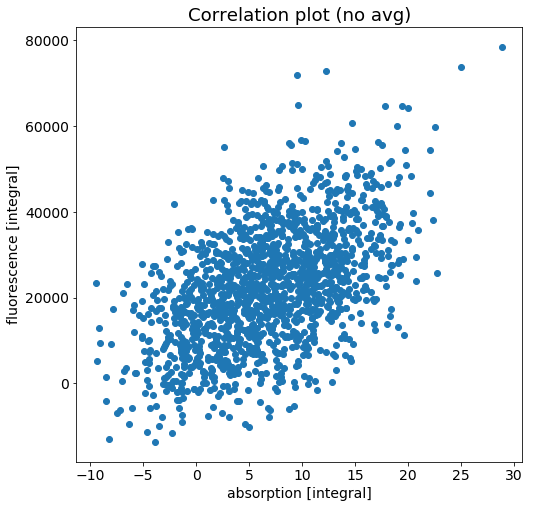

In [27]:
ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
ab = np.trapz(ab[:,10:1250], axis = 1)
pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]
pmt = np.trapz(pmt[:,100:], axis = 1)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(ab, pmt, '.', ms = 12)

ax.set_title(f"Correlation plot (no avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

# Alignment check center window 22 mW

In [28]:
dset_name = "1614704992 alignment check center window"
devices = ()

In [57]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(hdf_dir / fname, dset_name, devices)

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
norm_data = -pd_data/pdn_data

print(yag_data.shape)

dset_len = 2000
nbunch = 5

total_len = int((nbunch) * (yag_data.size//(dset_len*nbunch)))

yag_data = yag_data[:total_len]
pmt_data = pmt_data[:total_len]
pd_data = pd_data[:total_len]
pdn_data = pdn_data[:total_len]
norm_data = norm_data[:total_len]

(941, 2000)


In [58]:
mask_yag = yag_data[:total_len].max(axis = 1) < 500
mask_absorption = norm_data.max(axis = 1) > 0
pmt_data[mask_yag | mask_absorption] = np.nan
norm_data[mask_yag | mask_absorption] = np.nan

pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)

pmt_data_avg -= pmt_data_avg[:,slice_flm].mean(axis = 1)[:,np.newaxis]
norm_data_avg -= norm_data_avg[:,slice_absm].mean(axis = 1)[:,np.newaxis]

fluorescence_integral = np.trapz(pmt_data_avg[:,slice_fli], axis = 1)
absorption_integral = np.trapz(norm_data_avg[:,slice_absi], axis = 1)

C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


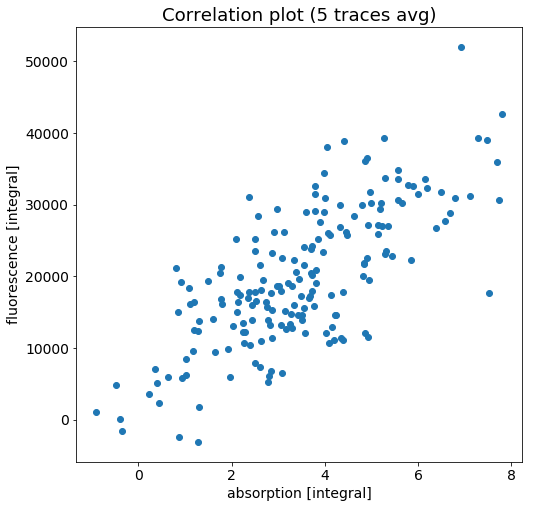

In [59]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(absorption_integral, fluorescence_integral, '.', ms = 12)

ax.set_title(f"Correlation plot ({nbunch} traces avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


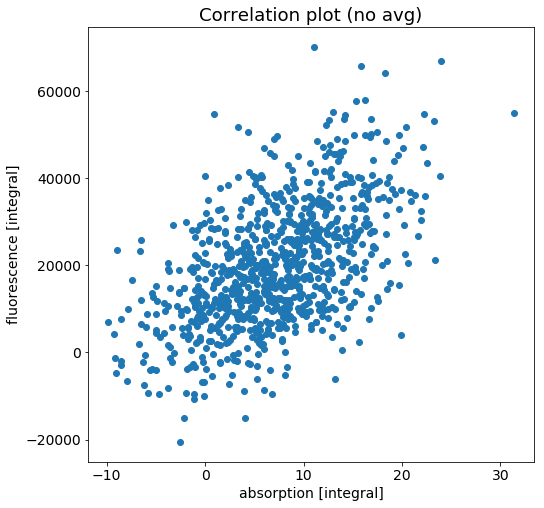

In [60]:
ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
ab = np.trapz(ab[:,10:1250], axis = 1)
pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]
pmt = np.trapz(pmt[:,100:], axis = 1)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(ab, pmt, '.', ms = 12)

ax.set_title(f"Correlation plot (no avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

## Correlation R0 F1 fluorescence and Q4 absorption with 10kHz lowpass instead of 1 kHz

In [87]:
dset_name = "1614708522 correlation check R0 F1 fluorescence Q4 absorption"
devices = ()

In [89]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(hdf_dir / fname, dset_name, devices)

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
norm_data = -pd_data/pdn_data

dset_len = 2000
nbunch = 5

total_len = int((nbunch) * (yag_data.size//(dset_len*nbunch)))

yag_data = yag_data[:total_len]
pmt_data = pmt_data[:total_len]
pd_data = pd_data[:total_len]
pdn_data = pdn_data[:total_len]
norm_data = norm_data[:total_len]

In [90]:
mask_yag = yag_data[:total_len].max(axis = 1) < 500
mask_absorption = norm_data.max(axis = 1) > 0
pmt_data[mask_yag | mask_absorption] = np.nan
norm_data[mask_yag | mask_absorption] = np.nan

pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)

pmt_data_avg -= pmt_data_avg[:,slice_flm].mean(axis = 1)[:,np.newaxis]
norm_data_avg -= norm_data_avg[:,slice_absm].mean(axis = 1)[:,np.newaxis]

fluorescence_integral = np.trapz(pmt_data_avg[:,slice_fli], axis = 1)
absorption_integral = np.trapz(norm_data_avg[:,slice_absi], axis = 1)

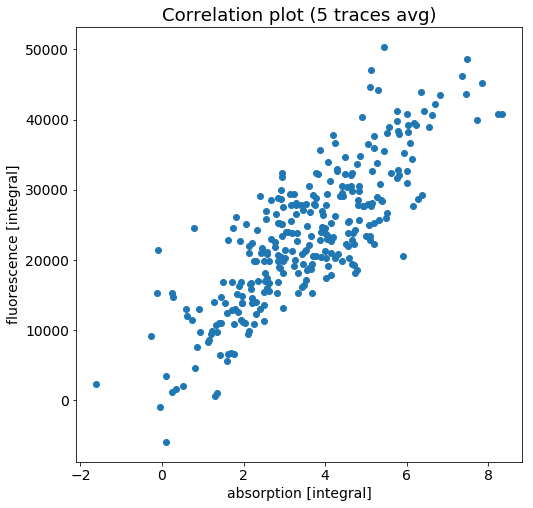

In [91]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(absorption_integral, fluorescence_integral, '.', ms = 12)

ax.set_title(f"Correlation plot ({nbunch} traces avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


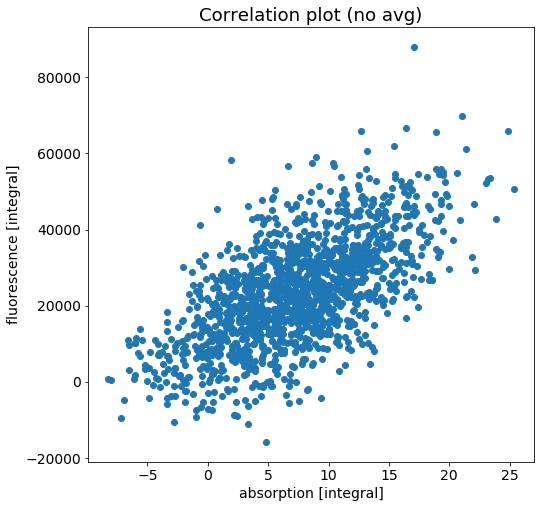

In [92]:
ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
ab = np.trapz(ab[:,10:1250], axis = 1)
pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]
pmt = np.trapz(pmt[:,100:], axis = 1)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(ab, pmt, '.', ms = 12)

ax.set_title(f"Correlation plot (no avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

## Correlation R0 F1 fluorescence and Q4 absorption no lowpass

In [94]:
dset_name = "1614709368 correlation check R0 F1 fluorescence Q4 absorption no lowpass"
devices = ()

In [95]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(hdf_dir / fname, dset_name, devices)

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
norm_data = -pd_data/pdn_data

dset_len = 2000
nbunch = 5

total_len = int((nbunch) * (yag_data.size//(dset_len*nbunch)))

yag_data = yag_data[:total_len]
pmt_data = pmt_data[:total_len]
pd_data = pd_data[:total_len]
pdn_data = pdn_data[:total_len]
norm_data = norm_data[:total_len]

In [96]:
mask_yag = yag_data[:total_len].max(axis = 1) < 500
mask_absorption = norm_data.max(axis = 1) > 0
pmt_data[mask_yag | mask_absorption] = np.nan
norm_data[mask_yag | mask_absorption] = np.nan

pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)

pmt_data_avg -= pmt_data_avg[:,slice_flm].mean(axis = 1)[:,np.newaxis]
norm_data_avg -= norm_data_avg[:,slice_absm].mean(axis = 1)[:,np.newaxis]

fluorescence_integral = np.trapz(pmt_data_avg[:,slice_fli], axis = 1)
absorption_integral = np.trapz(norm_data_avg[:,slice_absi], axis = 1)

C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


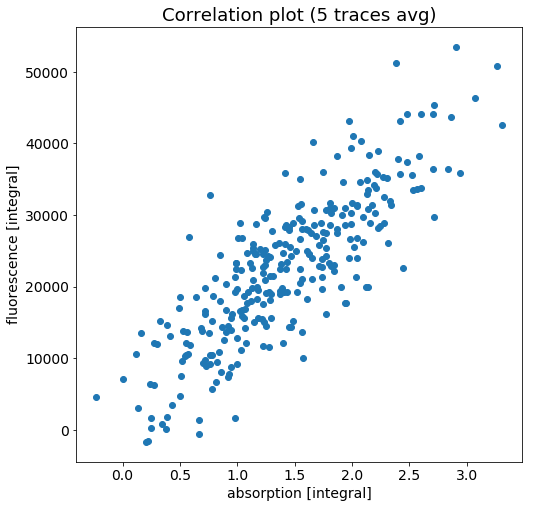

In [97]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(absorption_integral, fluorescence_integral, '.', ms = 12)

ax.set_title(f"Correlation plot ({nbunch} traces avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


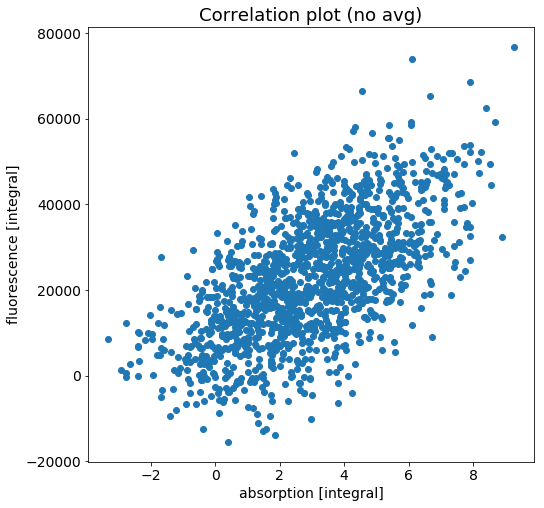

In [98]:
ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
ab = np.trapz(ab[:,10:1250], axis = 1)
pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]
pmt = np.trapz(pmt[:,100:], axis = 1)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(ab, pmt, '.', ms = 12)

ax.set_title(f"Correlation plot (no avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

## Correlation R0 F1 fluorescence and Q4 absorption no lowpass & moved absorption beam closer to cell

In [100]:
dset_name = "1614715288 correlation check R0 F1 fluorescence Q4 absorption no lowpass"
devices = ()

In [101]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(hdf_dir / fname, dset_name, devices)

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
norm_data = -pd_data/pdn_data

dset_len = 2000
nbunch = 5

total_len = int((nbunch) * (yag_data.size//(dset_len*nbunch)))

yag_data = yag_data[:total_len]
pmt_data = pmt_data[:total_len]
pd_data = pd_data[:total_len]
pdn_data = pdn_data[:total_len]
norm_data = norm_data[:total_len]

In [102]:
mask_yag = yag_data[:total_len].max(axis = 1) < 500
mask_absorption = norm_data.max(axis = 1) > 0
pmt_data[mask_yag | mask_absorption] = np.nan
norm_data[mask_yag | mask_absorption] = np.nan

pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)

pmt_data_avg -= pmt_data_avg[:,slice_flm].mean(axis = 1)[:,np.newaxis]
norm_data_avg -= norm_data_avg[:,slice_absm].mean(axis = 1)[:,np.newaxis]

fluorescence_integral = np.trapz(pmt_data_avg[:,slice_fli], axis = 1)
absorption_integral = np.trapz(norm_data_avg[:,slice_absi], axis = 1)

C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


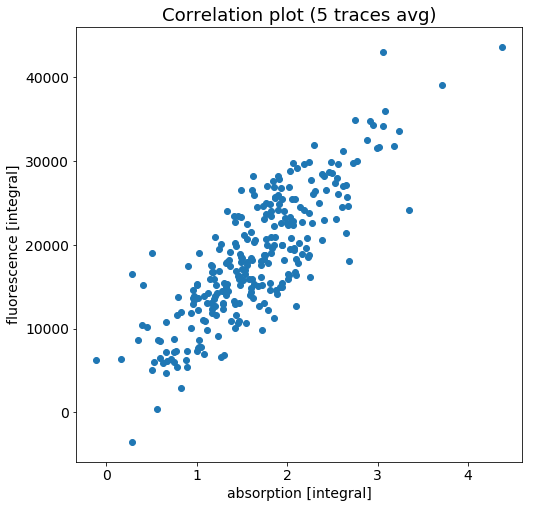

In [103]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(absorption_integral, fluorescence_integral, '.', ms = 12)

ax.set_title(f"Correlation plot ({nbunch} traces avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


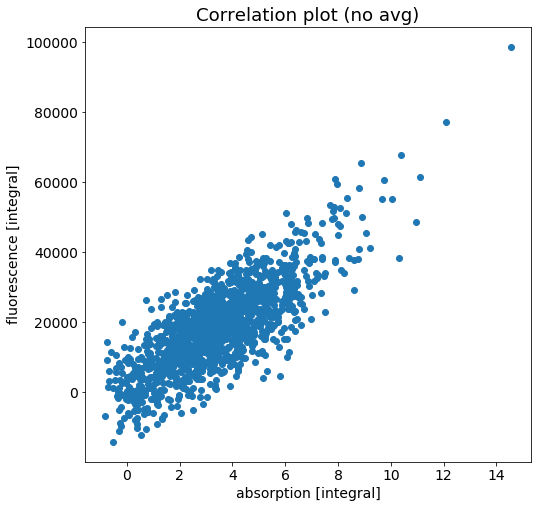

In [104]:
ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
ab = np.trapz(ab[:,10:1250], axis = 1)
pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]
pmt = np.trapz(pmt[:,100:], axis = 1)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(ab, pmt, '.', ms = 12)

ax.set_title(f"Correlation plot (no avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

## Correlation R0 F1 fluorescence and Q4 absorption no lowpass & fluorescence 5 mm up from center window

C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: Mean of empty slice


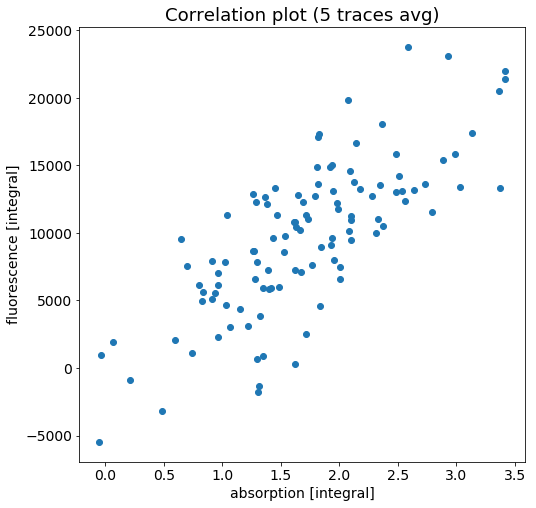

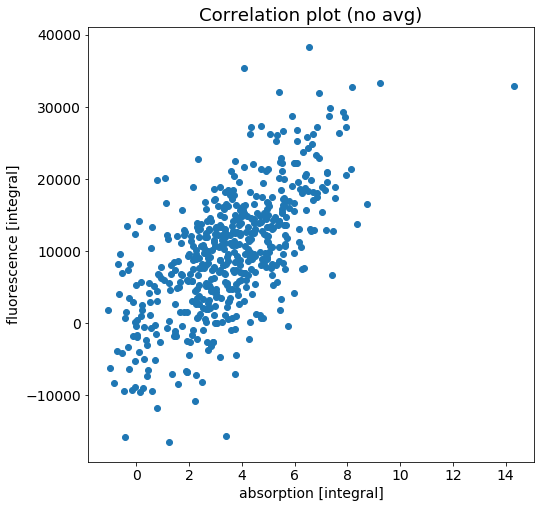

In [106]:
dset_name = "1614716135 correlation check R0 F1 fluorescence Q4 absorption 5 mm up from center"
devices = ()

pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(hdf_dir / fname, dset_name, devices)

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
norm_data = -pd_data/pdn_data

dset_len = 2000
nbunch = 5

total_len = int((nbunch) * (yag_data.size//(dset_len*nbunch)))

yag_data = yag_data[:total_len]
pmt_data = pmt_data[:total_len]
pd_data = pd_data[:total_len]
pdn_data = pdn_data[:total_len]
norm_data = norm_data[:total_len]

mask_yag = yag_data[:total_len].max(axis = 1) < 500
mask_absorption = norm_data.max(axis = 1) > 0
pmt_data[mask_yag | mask_absorption] = np.nan
norm_data[mask_yag | mask_absorption] = np.nan

pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)

pmt_data_avg -= pmt_data_avg[:,slice_flm].mean(axis = 1)[:,np.newaxis]
norm_data_avg -= norm_data_avg[:,slice_absm].mean(axis = 1)[:,np.newaxis]

fluorescence_integral = np.trapz(pmt_data_avg[:,slice_fli], axis = 1)
absorption_integral = np.trapz(norm_data_avg[:,slice_absi], axis = 1)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(absorption_integral, fluorescence_integral, '.', ms = 12)

ax.set_title(f"Correlation plot ({nbunch} traces avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
ab = np.trapz(ab[:,10:1250], axis = 1)
pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]
pmt = np.trapz(pmt[:,100:], axis = 1)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(ab, pmt, '.', ms = 12)

ax.set_title(f"Correlation plot (no avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

## Correlation R0 F1 fluorescence and Q4 absorption no lowpass & fluorescence 5 mm down from center window

C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: Mean of empty slice


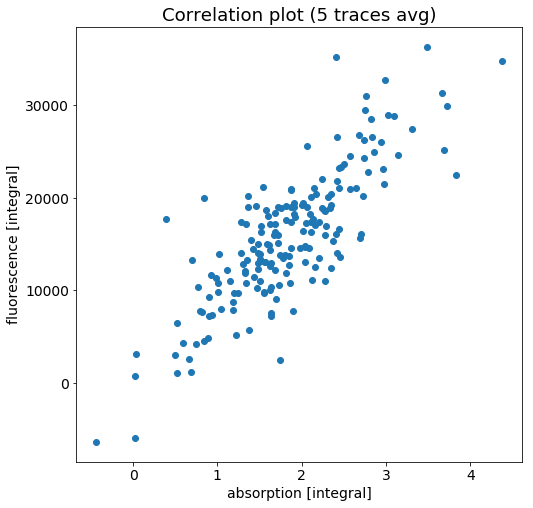

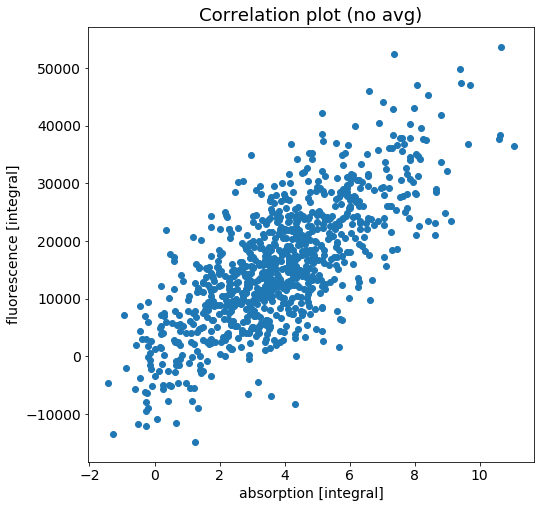

In [111]:
dset_name = "1614716813 correlation check R0 F1 fluorescence Q4 absorption 5 mm down from center"
devices = ()

pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(hdf_dir / fname, dset_name, devices)

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
norm_data = -pd_data/pdn_data

dset_len = 2000
nbunch = 5

total_len = int((nbunch) * (yag_data.size//(dset_len*nbunch)))

yag_data = yag_data[:total_len]
pmt_data = pmt_data[:total_len]
pd_data = pd_data[:total_len]
pdn_data = pdn_data[:total_len]
norm_data = norm_data[:total_len]

mask_yag = yag_data[:total_len].max(axis = 1) < 500
mask_absorption = norm_data.max(axis = 1) > 0
pmt_data[mask_yag | mask_absorption] = np.nan
norm_data[mask_yag | mask_absorption] = np.nan

pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)

pmt_data_avg -= pmt_data_avg[:,slice_flm].mean(axis = 1)[:,np.newaxis]
norm_data_avg -= norm_data_avg[:,slice_absm].mean(axis = 1)[:,np.newaxis]

fluorescence_integral = np.trapz(pmt_data_avg[:,slice_fli], axis = 1)
absorption_integral = np.trapz(norm_data_avg[:,slice_absi], axis = 1)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(absorption_integral, fluorescence_integral, '.', ms = 12)

ax.set_title(f"Correlation plot ({nbunch} traces avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
ab = np.trapz(ab[:,10:1250], axis = 1)
pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]
pmt = np.trapz(pmt[:,100:], axis = 1)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(ab, pmt, '.', ms = 12)

ax.set_title(f"Correlation plot (no avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

## Correlation R0 F1 fluorescence and Q4 absorption expanded beam 6x

C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice
C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: Mean of empty slice


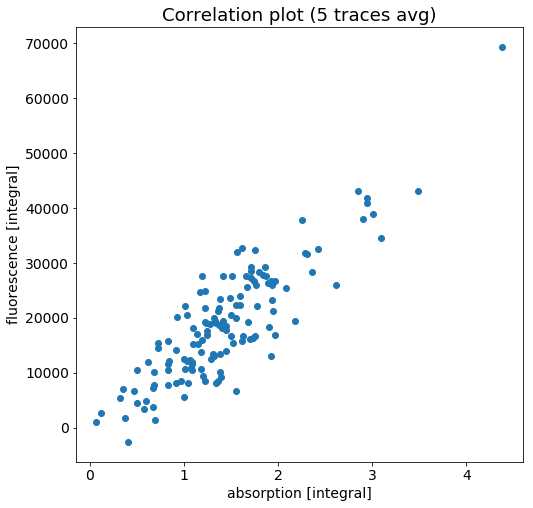

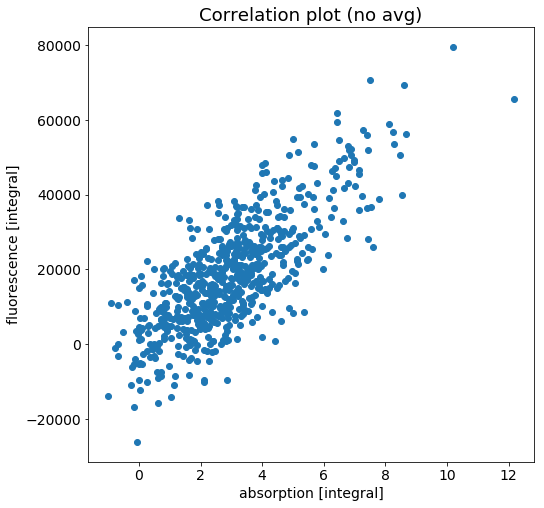

In [113]:
dset_name = "1614723484 correlation R0 F1 fl with Q4 abs expanded beam 6x"
devices = ()

pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(hdf_dir / fname, dset_name, devices)

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
norm_data = -pd_data/pdn_data

dset_len = 2000
nbunch = 5

total_len = int((nbunch) * (yag_data.size//(dset_len*nbunch)))

yag_data = yag_data[:total_len]
pmt_data = pmt_data[:total_len]
pd_data = pd_data[:total_len]
pdn_data = pdn_data[:total_len]
norm_data = norm_data[:total_len]

mask_yag = yag_data[:total_len].max(axis = 1) < 500
mask_absorption = norm_data.max(axis = 1) > 0
pmt_data[mask_yag | mask_absorption] = np.nan
norm_data[mask_yag | mask_absorption] = np.nan

pmt_data_avg = np.nanmean(pmt_data.reshape(-1,nbunch,dset_len), axis = 1)
norm_data_avg = np.nanmean(norm_data.reshape(-1,nbunch,dset_len), axis = 1)

pmt_data_avg -= pmt_data_avg[:,slice_flm].mean(axis = 1)[:,np.newaxis]
norm_data_avg -= norm_data_avg[:,slice_absm].mean(axis = 1)[:,np.newaxis]

fluorescence_integral = np.trapz(pmt_data_avg[:,slice_fli], axis = 1)
absorption_integral = np.trapz(norm_data_avg[:,slice_absi], axis = 1)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(absorption_integral, fluorescence_integral, '.', ms = 12)

ax.set_title(f"Correlation plot ({nbunch} traces avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)

ab = norm_data - np.nanmean(norm_data[:,-750:], axis = 1)[:,np.newaxis]
ab = np.trapz(ab[:,10:1250], axis = 1)
pmt = pmt_data - np.nanmean(pmt_data[:,100:250], axis = 1)[:,np.newaxis]
pmt = np.trapz(pmt[:,100:], axis = 1)

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(ab, pmt, '.', ms = 12)

ax.set_title(f"Correlation plot (no avg)")
ax.set_xlabel("absorption [integral]")
ax.set_ylabel('fluorescence [integral]')
set_fontsize(ax, 14)